Index(['Book-Title', 'Book-Author', 'User-ID', 'ISBN', 'Book-Rating',
       'Year-Of-Publication', 'Publisher', 'Location', 'Age', 'category',
       'description', 'num_words', 'num_chars', 'cleaned_description',
       'Theme'],
      dtype='object')
                                Book-Title       Book-Author  User-ID  \
0                         The Terminal Man  Michael Crichton   276964   
1                              The Chamber      John Grisham   276964   
2  The Girl Who Loved Tom Gordon : A Novel      Stephen King   276964   
3                              In the Dark    Richard Laymon   276964   
4                        Tailchaser's Song      Tad Williams   276964   

        ISBN  Book-Rating  Year-Of-Publication                Publisher  \
0  345354621           10                 1988         Ballantine Books   
1  440220602            9                 1995  Dell Publishing Company   
2  684867621            8                 1999                 Scribner   
3  8439

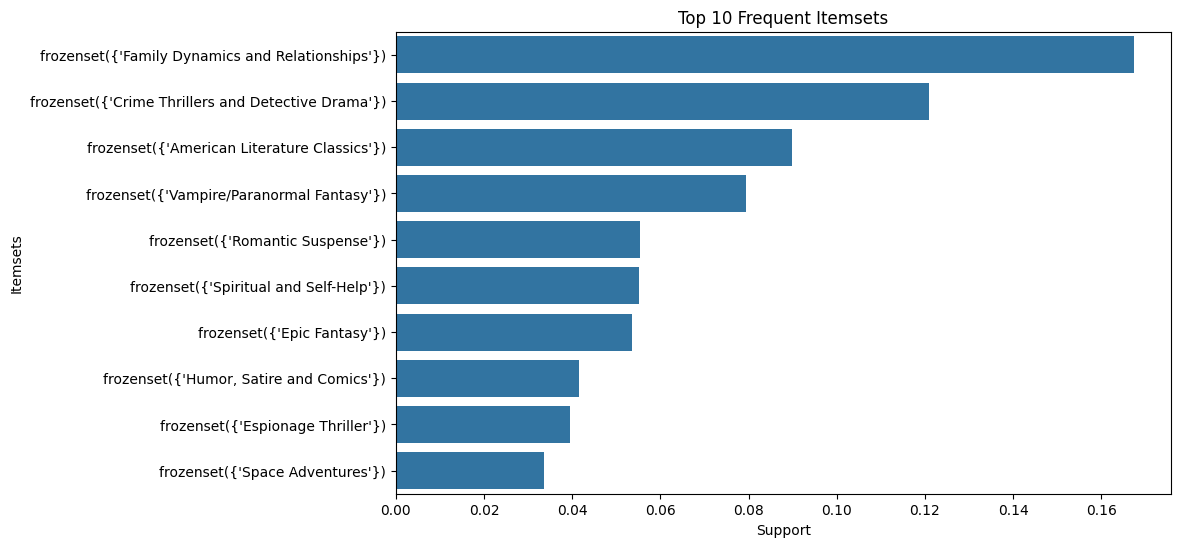

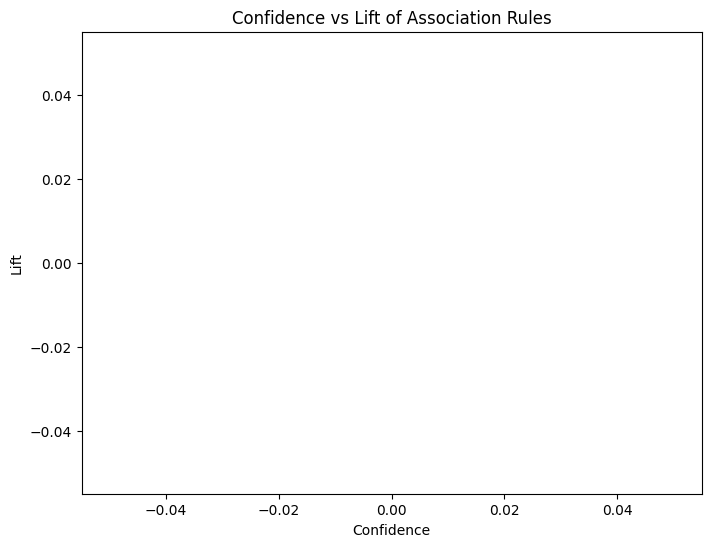

In [2]:
# Step 1: Importing Libraries
# First, I need to import the necessary libraries for data processing and association rule mining.
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Loading the Dataset
# I'll load the dataset using pandas and check the first few rows to understand its structure.
file_path = 'C:/Users/DELL/Downloads/archive (4)/BookCrossingThemes.csv'
df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')

# Step 3: Inspecting the Data
# Now, I'll take a look at the column names and the first few rows of the dataset to understand its contents.
print(df.columns)  # Display column names
print(df.head())  # Display the first few rows

# Step 4: Data Cleaning
# I'll clean the dataset by focusing on the 'Theme' column, as this will be used for frequent itemset mining.
# Check if there are any missing values in the 'Theme' column
missing_values = df['Theme'].isnull().sum()

# Since there are no missing values in the 'Theme' column, I'll proceed with encoding it.
# I'll create a one-hot encoded version of the 'Theme' column, where each theme is a separate column.

theme_data = pd.get_dummies(df['Theme'])

# Display the first few rows of the encoded data to verify
print(theme_data.head())

# Step 5: Applying the Apriori Algorithm
# I'll now apply the Apriori algorithm to find frequent itemsets in the dataset.
# I set a minimum support threshold of 0.01, which means I'll only consider itemsets that appear in at least 1% of transactions.

frequent_itemsets_apriori = apriori(theme_data, min_support=0.01, use_colnames=True)

# Step 6: Displaying Frequent Itemsets
# Let's display the top frequent itemsets along with their support values.

print(frequent_itemsets_apriori.head())

# Step 7: Generating Association Rules
# Next, I'll generate association rules using the frequent itemsets I just found. 
# I'll focus on the "lift" metric and set a minimum threshold of 1 for the lift.

rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# Step 8: Displaying Association Rules
# I'll display the top association rules and their metrics such as support, confidence, and lift.

print(rules_apriori.head())

# Step 9: Visualizing the Frequent Itemsets
# To help understand the distribution of the frequent itemsets, I'll use Seaborn's barplot to visualize the support values.

plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Step 10: Visualizing Association Rules
# Finally, I'll visualize the relationship between confidence and lift using a scatter plot to see which rules are the strongest.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='confidence', y='lift', data=rules_apriori)
plt.title('Confidence vs Lift of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()
